In [2]:
# DataFrame
import pandas as pd 

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


#tensorflow
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# Utility
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

In [3]:
df=pd.read_csv('Data/training.1600000.processed.noemoticon.csv',encoding='latin',header=None)

In [4]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df.columns=['sentiment', 'id', 'date', 'query', 'user_id', 'text']

In [6]:
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
# we train only on text for sentiment
df=df.drop(['id', 'date', 'query', 'user_id'],axis=1)

In [8]:
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [9]:
df['sentiment']=df['sentiment'].replace(4,1)
df.head()  
df.tail() 

,sentiment,text
1599995,1,Just woke up. Having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...
1599999,1,happy #charitytuesday @theNSPCC @SparksCharity...


In [10]:
val_counts=df['sentiment'].value_counts()
val_counts

sentiment
0    800000
1    800000
Name: count, dtype: int64

Text(0.5, 1.0, 'sentiment distribution')

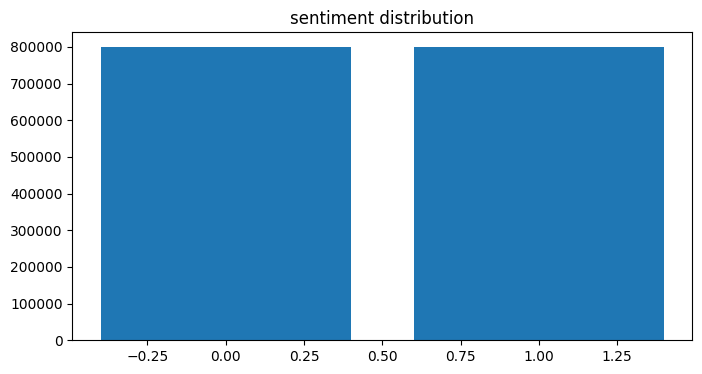

In [11]:
plt.figure(figsize=(8,4))
plt.bar(val_counts.index,val_counts.values)
plt.title('sentiment distribution')

In [12]:
# get a word count per of text
def word_count(words):
    return len(words.split())

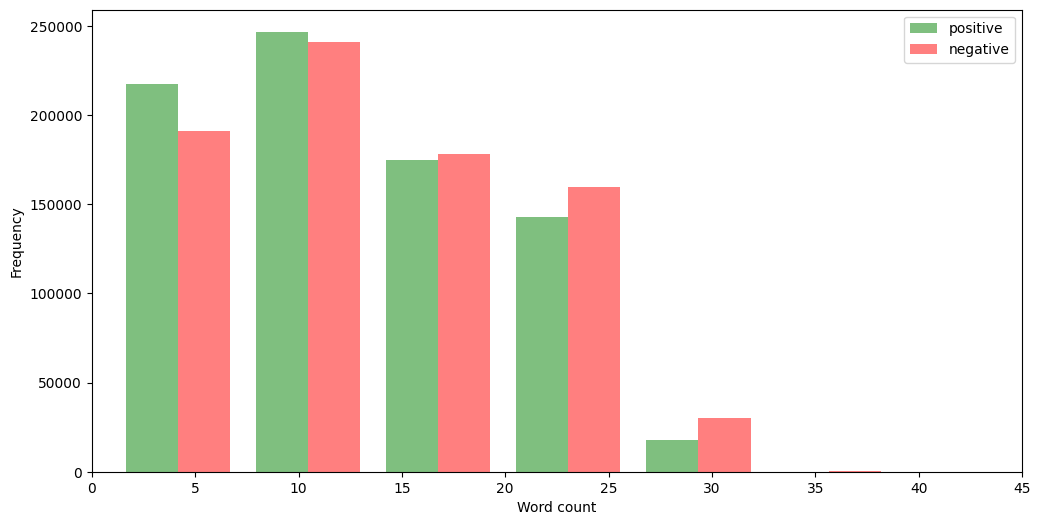

In [13]:
# plot word count distribution for both positive and negative 

df['word count'] = df['text'].apply(word_count)
p = df['word count'][df.sentiment == 1]
n = df['word count'][df.sentiment == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [14]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

# assign to a variable
stopword = {"won't",}

{'but', 'you', "it's", "hasn't", 'shouldn', 'other', 'weren', 'here', 'in', "wasn't", 'o', 'we', 'while', 'themselves', 'very', 'she', 's', 'your', 'where', 'ma', 'hadn', 'further', 'does', 'a', 'these', 'what', 'over', "mightn't", 'hasn', 'between', 'my', 'an', 'it', "don't", 'some', 'did', 'be', 'd', 'been', 'shan', 'own', 'not', 'myself', "wouldn't", 'having', 'yourself', 'was', 'against', 'herself', 'ourselves', "hadn't", 'same', 'his', 'few', 'from', 'can', 'on', 'will', 'ours', 'being', 'won', 'those', 'i', 'this', "shouldn't", 'our', 'he', 'that', 'wasn', 'to', 'the', 'or', 'out', 'do', 'into', 'couldn', 'during', 'when', 'at', 'each', "that'll", 'haven', 'which', 'up', 'are', 'no', 'itself', 'for', 'with', 'have', 'down', 'once', 'don', 'before', 'why', 'him', 'were', 'isn', 'so', 'hers', 'm', 'doing', 'then', 'such', 'didn', "needn't", 'off', 'aren', 'yours', "shan't", 'they', 'has', 'its', 'any', 'am', 'only', "weren't", 'of', 'by', 'had', 'above', 've', 'too', 'below', 'afte

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\devas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
df['text'] = df['text'].astype('str')
df.head()

,sentiment,text,word count
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19
1,0,is upset that he can't update his Facebook by ...,21
2,0,@Kenichan I dived many times for the ball. Man...,18
3,0,my whole body feels itchy and like its on fire,10
4,0,"@nationwideclass no, it's not behaving at all....",21


In [17]:
from nltk.tokenize import word_tokenize
import string

urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = r'@[^\s]+'
def preprocess(tweet):
  # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls 
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet) 
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [18]:
import time
t = time.time()
df['processed_tweets'] = df['text'].apply(lambda x: preprocess(x))
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 130 seconds


In [19]:
df.head()

,sentiment,text,word count,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19,switchfoot awww thats bummer you shoulda got d...
1,0,is upset that he can't update his Facebook by ...,21,upset that he cant update his facebook by text...
2,0,@Kenichan I dived many times for the ball. Man...,18,kenichan dived many time for the ball managed ...
3,0,my whole body feels itchy and like its on fire,10,whole body feel itchy and like it on fire
4,0,"@nationwideclass no, it's not behaving at all....",21,nationwideclass no it not behaving at all im m...


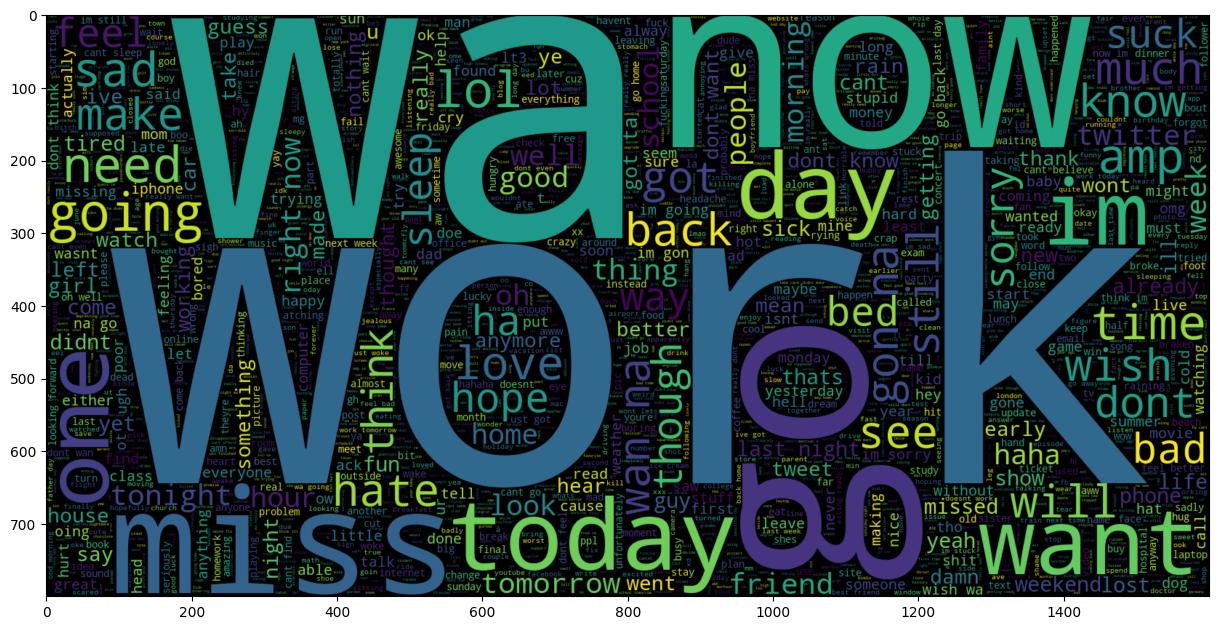

In [20]:
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 0].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

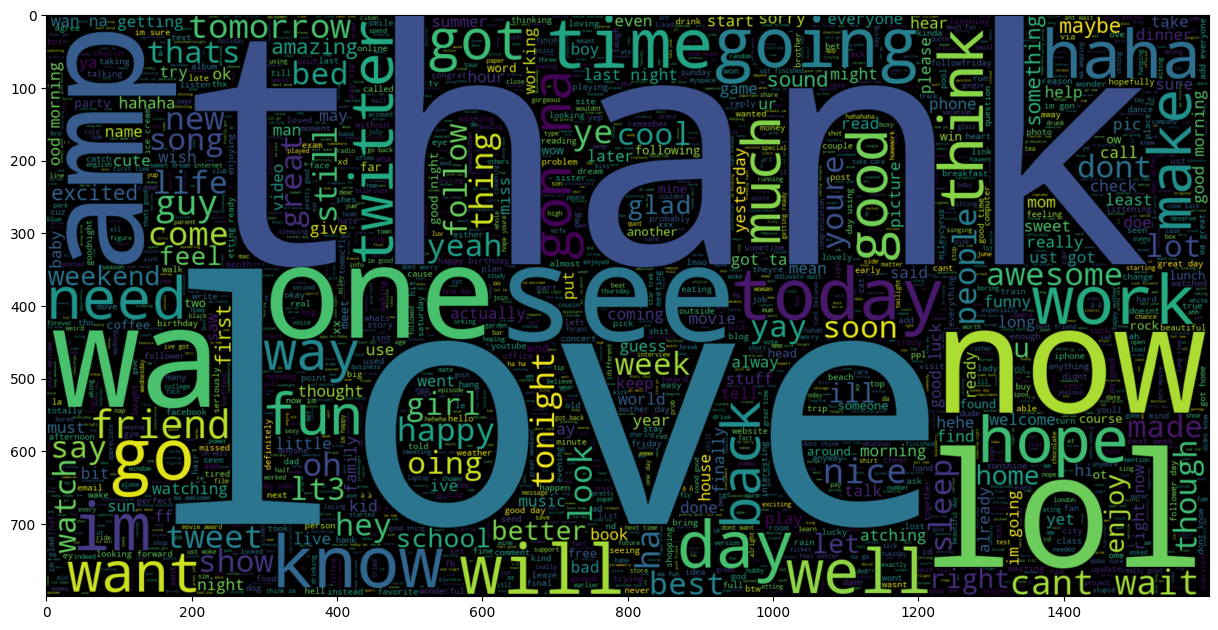

In [21]:
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 1].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

In [22]:
X = df['processed_tweets'].values
y = df['sentiment'].values

In [23]:
print(X.shape)
print(y.shape)

(1600000,)
(1600000,)


In [24]:
#Convert a collection of raw documents to a matrix of TF-IDF features.
X = df['processed_tweets'].values
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)
print(f'Vector fitted.')
print('No. of feature_words: ', len(vector.get_feature_names_out()))

Vector fitted.
No. of feature_words:  762418


In [25]:
print(X.shape)
print(y.shape)

(1600000, 762418)
(1600000,)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=101)

In [27]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (1280000, 762418)
y_train (1280000,)

X_test (320000, 762418)
y_test (320000,)


In [30]:
# Logistic Regression
lg = LogisticRegression()
history=lg.fit(X_train, y_train)

accuracy = lg.score(X_test, y_test)
print(f'Accuracy: {accuracy}')


Accuracy: 0.796790625


In [31]:
# Support Vector Machine
svc = LinearSVC()
history=svc.fit(X_train, y_train)

accuracy = svc.score(X_test, y_test)
print(f'Accuracy: {accuracy}')


Accuracy: 0.79174375
